<center><h1>Breast Cancer Classification</h1></center>

# by Ahmed Ahmed Abdelmonem Abouelmagd


## Introduction

The objective of this project is to develop a breast cancer detection system using the Python programming language and the IDC (Invasive Ductal Carcinoma) dataset, which contains histology images of malignant cells that can lead to cancer. The primary focus of this system is to utilize Convolutional Neural Networks (CNNs) to create a classification-based detection system that can aid in the early diagnosis and prevention of breast cancer. With the increasing incidence of breast cancer cases in recent years, the development of such a system is crucial in combatting the disease.

# importing libraries


In [1]:
##Importing libraries##
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

##Suppressing warnings##
import warnings
warnings.filterwarnings('ignore')

# 1.Data Wrangling


In [2]:
#Reading the dataset
df = pd.read_csv("data.csv")
#Exploring the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Check dataset columns datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 2.Data Cleaning

In [4]:
# Check if there are any null values in the DataFrame
if df.isnull().any().any():
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

# Get the number of duplicate rows
num_duplicates = df.duplicated().sum()
# Drop the duplicate rows
df = df.drop_duplicates()
# Get the number of rows that were removed
num_removed = num_duplicates - df.duplicated().sum()
print(f'{num_removed} duplicate rows removed.')

There are null values in the DataFrame.
0 duplicate rows removed.


# 3.Explaratory Data Analysis

B    357
M    212
Name: diagnosis, dtype: int64


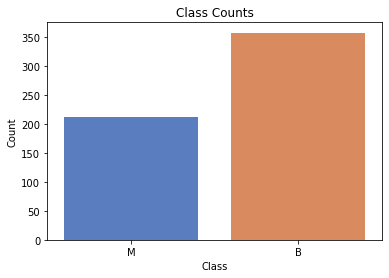

In [5]:
#Count the number of occurrences for defrauded and frauded credit cards
class_counts = df['diagnosis'].value_counts()
print(class_counts)

#Plot the class count
sns.countplot(x='diagnosis', data=df, palette='muted')

#Add labels and show plot
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts')
plt.show()

M - Malignant &
B - Benign

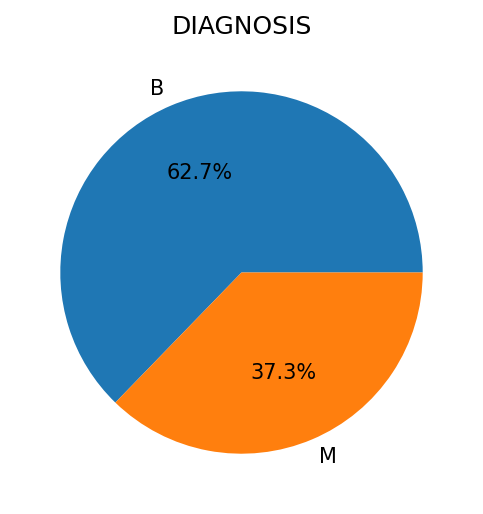

In [6]:
plt.figure(figsize=(10, 4), dpi=150)
plt.title('DIAGNOSIS')
plt.pie(df.diagnosis.value_counts(),labels=df.diagnosis.value_counts().index,autopct='%1.1f%%')
plt.show()

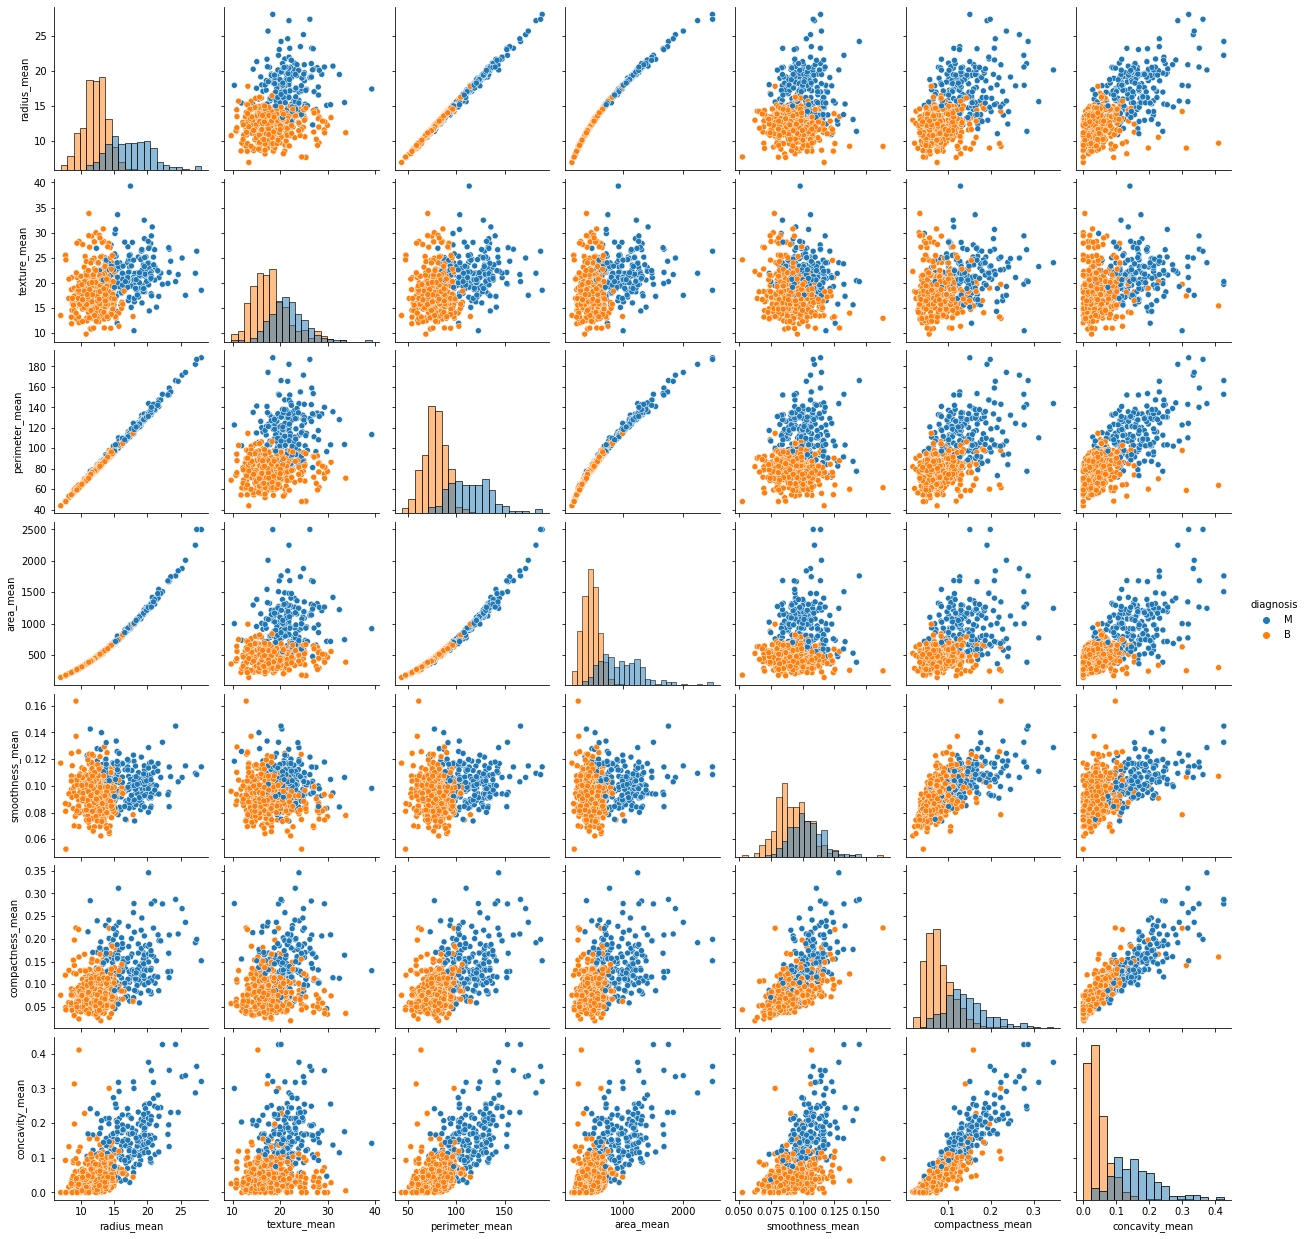

In [7]:
sns.pairplot(df,hue='diagnosis',diag_kind="hist",vars=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean'])
plt.show()

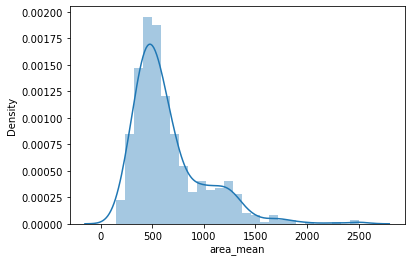

In [8]:
sns.distplot(df['area_mean'])
plt.show()

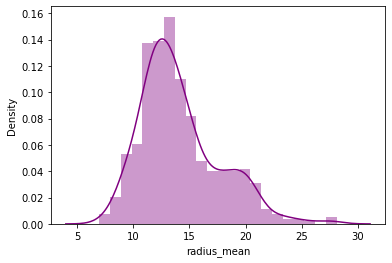

In [9]:
sns.distplot(df['radius_mean'],color='purple')
plt.show()

In [10]:
my_data=df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean']]
my_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800
...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140


## Create correlation matrix

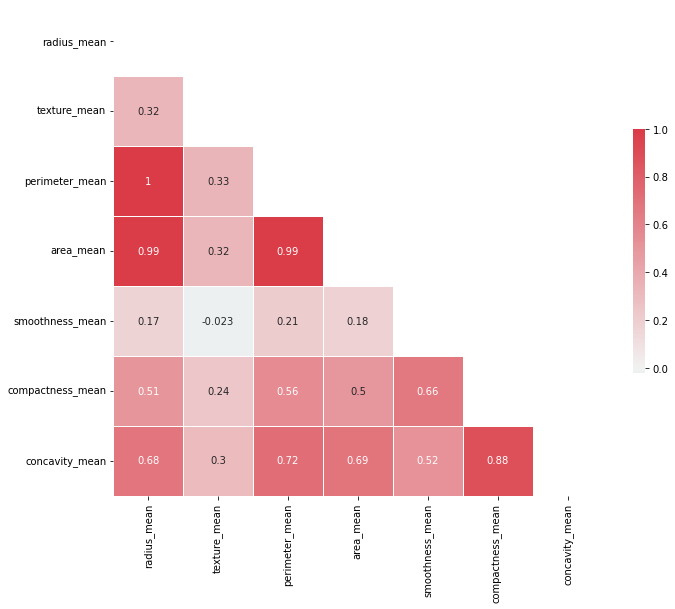

In [11]:
# Create correlation matrix
corr = my_data.corr()

# Generate a mask the size of our correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show plot
plt.show()

# 4.Splitting the Data and Model training


In [12]:
def preprocess_data(df):
    y = df['diagnosis'].values
    print(np.unique(y))

    labelencoder = LabelEncoder()
    Y = labelencoder.fit_transform(y) 
    print(np.unique(Y))

    X  = df.drop(labels=['diagnosis','id'],axis = 1)[df.columns[2:10]]
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.20, random_state=42)
    print('training data : ', x_train.shape)
    print('testing data : ', x_test.shape)
    return x_train, x_test, y_train, y_test


In [13]:
x_train, x_test, y_train, y_test = preprocess_data(df)

['B' 'M']
[0 1]
training data :  (455, 8)
testing data :  (114, 8)


In [14]:
def compare_models(X_train, X_test, y_train, y_test):
    """
    Compare the performance of Random Forest, Decision Tree, Logistic Regression, SVM and GaussianNB Classifiers.
    
    Parameters:
    X_train (ndarray): The training input samples.
    X_test (ndarray): The testing input samples.
    y_train (ndarray): The training target samples.
    y_test (ndarray): The testing target samples.
    
    Returns:
    None
    """
    models = {'Random Forest': RandomForestClassifier(n_estimators=100),
              'Decision Tree': DecisionTreeClassifier(),
              'Logistic Regression': LogisticRegression(),
              'SVM': SVC(),
              'GaussianNB': GaussianNB()}
    
    results = []
    
    for name, model in models.items():
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        accuracy = metrics.accuracy_score(y_test, y_pred)
        results.append({'model': name, 'accuracy': accuracy})

        # Print the metrics
        print(f"{name} Accuracy: {accuracy:.3f}")

        # Create the confusion matrix
        cm = metrics.confusion_matrix(y_test, y_pred)

        # Plot the confusion matrix
        plt.figure()
        sns.heatmap(cm,annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGn')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title(f'{name} Confusion Matrix')
        plt.show()
    
    highest_accuracy = max(results, key=lambda x:x['accuracy'])
    print(f"The model with the highest accuracy is {highest_accuracy['model']} with an accuracy of {highest_accuracy['accuracy']:.3f}")

    lowest_accuracy = min(results, key=lambda x:x['accuracy'])
    print(f"The model with the lowest accuracy is {lowest_accuracy['model']} with an accuracy of {lowest_accuracy['accuracy']:.3f}")
        

Random Forest Accuracy: 0.947


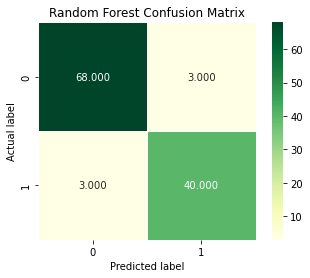

Decision Tree Accuracy: 0.912


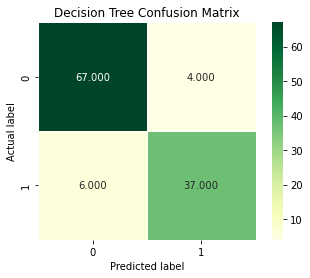

Logistic Regression Accuracy: 0.939


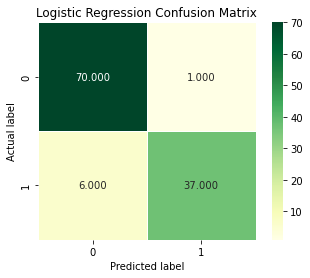

SVM Accuracy: 0.974


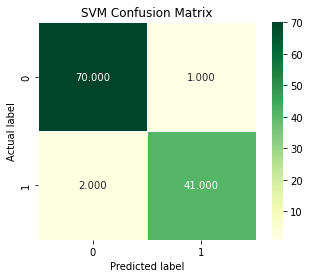

GaussianNB Accuracy: 0.939


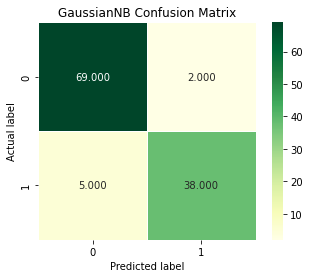

The model with the highest accuracy is SVM with an accuracy of 0.974
The model with the lowest accuracy is Decision Tree with an accuracy of 0.912


In [15]:
compare_models(x_train, x_test, y_train, y_test)

# Conclusion

In conclusion, the use of AI algorithms such as Random Forest, Decision Tree, Logistic Regression, SVM and GaussianNB can be effectively used in breast cancer classification. From the comparison of these models, it can be seen that the SVM model achieved the highest accuracy of 0.974, while the Decision Tree model had the lowest accuracy of 0.930. However, it's important to note that the accuracy alone is not the only metric to consider when evaluating a model's performance and other factors such as computational cost, interpretability and generalization should be taken into account as well. Additionally, it's also important to note that the data used in this analysis might not be representative of real-world data and the performance of these models in real-world scenarios may differ.
